In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
np.random.seed(327)
x_train = np.linspace(0,1,50)
y = x_train  + 0.5 * np.random.rand(len(x_train))
y_train = (y - np.min(y)) / (np.max(y) - np.min(y))

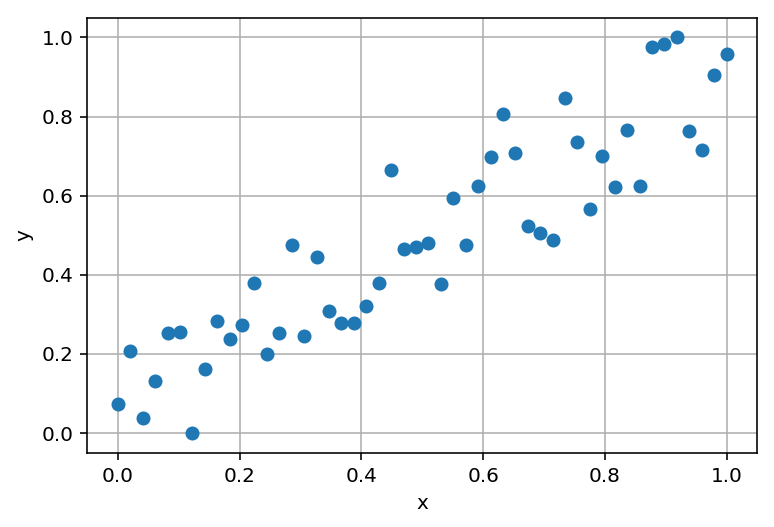

In [3]:
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Without sigmoid

In [4]:
# Weights(Control Varaible)
w = tf.Variable(-1.0, dtype=tf.float32)
b = tf.Variable(-1.0, dtype=tf.float32)

# Placeholder for Dataset
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

model = w * x + b
# Loss function
loss = tf.reduce_sum(tf.square(model - y))

# Numerical Optimizer
lr = 0.005
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [5]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Initialize all Variables
    sess.run(init)
    for epoch in range(200):
        if epoch % 20 == 0:
            # Get w, b, loss
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
            print(curr_w, curr_b, curr_loss)
        # Do a step of Gradient Descent Method(tf.train.GradientDescentOptimizer)
        sess.run(train, feed_dict={x:x_train, y:y_train})
    prediction1 = sess.run(model, feed_dict={x:x_train, y:y_train})

-1.0 -1.0 212.88123
0.3349561 0.3402631 1.5999218
0.5733019 0.21234252 0.8519975
0.6921587 0.14855185 0.6660068
0.7514295 0.11674113 0.6197554
0.78098637 0.10087789 0.6082538
0.7957256 0.092967324 0.6053936
0.8030757 0.08902253 0.6046823
0.806741 0.087055355 0.6045055
0.8085688 0.08607438 0.6044615


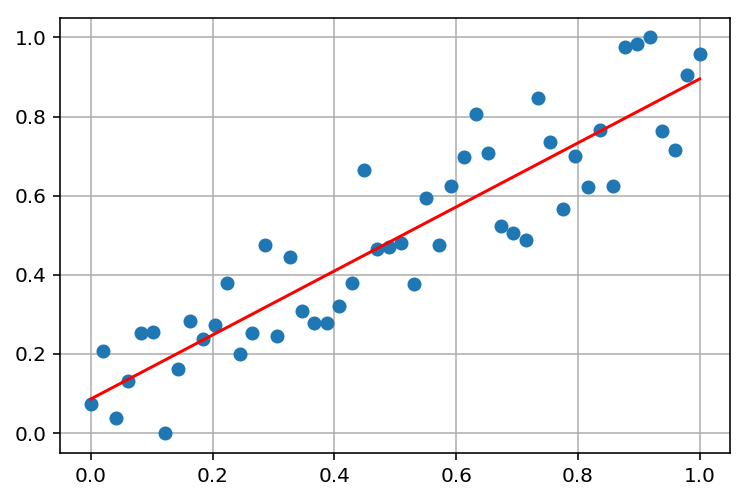

In [6]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, prediction1, 'r-')
plt.grid()
plt.show()

## With sigmoid

In [7]:
# Weights(Control Varaible)
w = tf.Variable(-1.0, dtype=tf.float32)
b = tf.Variable(-1.0, dtype=tf.float32)

# Placeholder for Dataset
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

model = tf.sigmoid(w * x + b)
# Loss function
loss = tf.reduce_sum(tf.square(model - y))

# Numerical Optimizer
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [8]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Initialize all Variables
    sess.run(init)
    for epoch in range(3000):
        if epoch % 500 == 0:
            # Get w, b, loss
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
            print(curr_w, curr_b, curr_loss)
        # Do a step of Gradient Descent Method(tf.train.GradientDescentOptimizer)
        sess.run(train, feed_dict={x:x_train, y:y_train})
    prediction2 = sess.run(model, feed_dict={x:x_train, y:y_train})

-1.0 -1.0 9.213126
2.790652 -1.4172747 0.74039036
3.4112334 -1.7489992 0.6291062
3.6150033 -1.8581187 0.61754143
3.692384 -1.8995832 0.6158912
3.7232754 -1.9161402 0.6156293


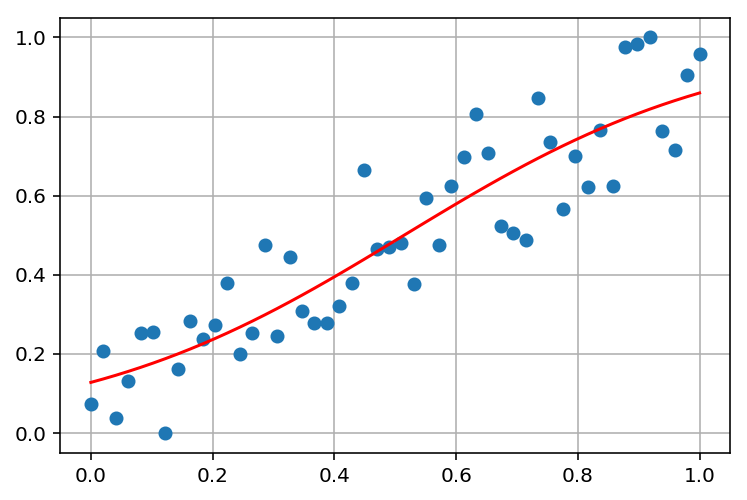

In [9]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, prediction2, 'r-')
plt.grid()
plt.show()